In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# Gennerate sample data
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,
                            random_state=0)
X + StandardScaler().fit_transform(X)

array([[ 1.33448136,  2.59908932],
       [-2.58282933, -2.04118086],
       [ 1.01719532,  1.7629388 ],
       ...,
       [ 0.21084982, -2.1875951 ],
       [-2.0556822 , -0.26333556],
       [ 0.86368999, -2.22255421]])

In [3]:
# Compute DBSCAN
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 22
Homogeneity: 0.947
Completeness: 0.868
V-measure: 0.906
Adjusted Rand Index: 0.943
Adjusted Mutual Information: 0.905
Silhouette Coefficient: 0.621


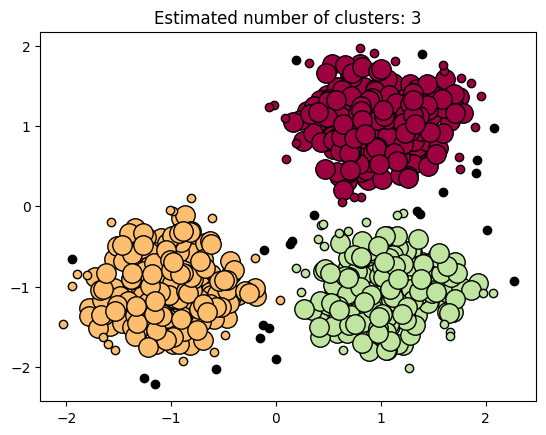

In [4]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
